# Classificação de sinais de trânsito

<img src="img/CLASSIFICACAO_DE_SINAIS_DE_TRANSITO_01.png">


<img src="img/CLASSIFICACAO_DE_SINAIS_DE_TRANSITO_02.png">

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1: Importação das bibliotecas

In [1]:
#%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os # acessar recursos do SO
import PIL # acessar imagem
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle  # https://docs.python.org/3/library/pickle.html
import zipfile 
tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

# Etapa 2: Importação da base de dados

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# vamos descompactar traffic-signs-data.zip 
path = 'traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close() # para liberar memória

In [4]:
# rb Abre um arquivo para leitura apenas em formato binário.
with open('traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)  # base de dados de treinamento
with open('traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)  # base de dados de teste
with open('traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)  # base de dados de validação

In [5]:
# possui índice features e labels(classe a qual pertence)
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [6]:
test

{'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,
          [115, 137, 169],
          [116, 136, 168],
          [118, 139, 172]],
 
         [[116, 136, 166],
          [114, 134, 168],
     

In [7]:
valid

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8), 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 15],
          [18, 16, 16],
          ...,
          [12, 11, 1

In [8]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [9]:
# 3 canais pois são imagens coloridas que contém tons de RGB
X_train.shape

(34799, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

In [11]:
X_test.shape

(12630, 32, 32, 3)

In [12]:
X_validation.shape

(4410, 32, 32, 3)

# Etapa 3: Visualização dos dados

1

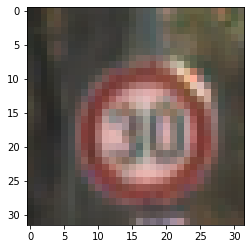

In [13]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

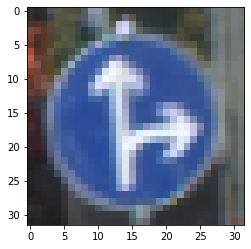

In [14]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

8

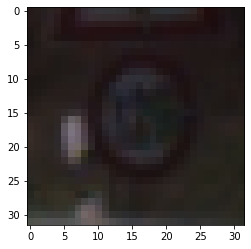

In [15]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4: Preparação dos dados

In [16]:
# apenas para mostrar que faz o embaralhamento consistente
from sklearn.utils import shuffle

a=[1,2,3,4,5]
b=[10,20,30,40,50]
a1, b1 = shuffle(a, b)
print(a1, b1)

[1, 4, 3, 5, 2] [10, 40, 30, 50, 20]


In [17]:
# Faz embaralhamento 
X_train, y_train = shuffle(X_train, y_train)

In [18]:
X_train.shape

(34799, 32, 32, 3)

In [19]:
# https://www.w3schools.com/colors/colors_rgb.asp
# axis=3 ir definir como 1 dimensão o quarto elemento da tupla (34799, 32, 32, 1)
# Para não bagunçar as dimensões keepdims=True
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True) 
X_train_gray.shape

(34799, 32, 32, 1)

In [20]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [21]:
X_train_gray.shape

(34799, 32, 32, 1)

In [22]:
X_test_gray.shape

(12630, 32, 32, 1)

In [23]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [24]:
# Caso queiras valores entre zero e um divide por 255
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [25]:
np.max(X_train_gray_norm)

0.9921875

In [26]:
np.min(X_train_gray_norm)

-0.9713541666666666

In [27]:
X_train_gray[i].shape

(32, 32, 1)

In [28]:
X_train_gray[i].shape  # (32, 32, 1)
X_train_gray[i].squeeze().shape # (32, 32)

(32, 32)

In [29]:
X_train_gray[i].squeeze().shape

(32, 32)

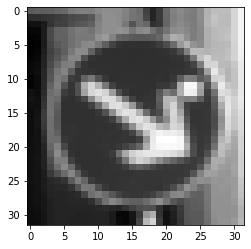

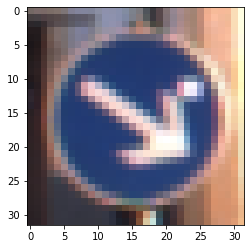

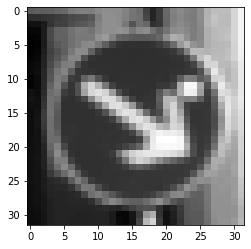

In [30]:
i = 60
# imagem em escala de cinza
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
# imagem original
plt.imshow(X_train[i])
plt.figure()
# imagem normalizada que é igual a de escala de cinza, pois você muda a escala dos valores mas a imagem fica igual
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

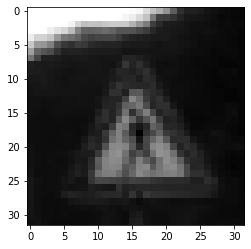

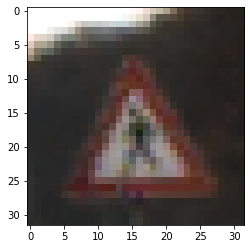

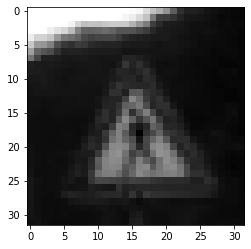

In [31]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

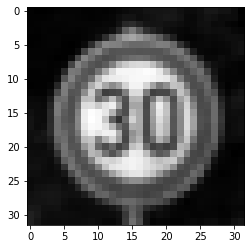

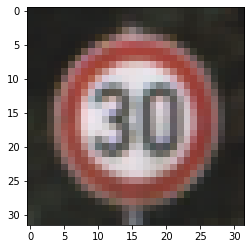

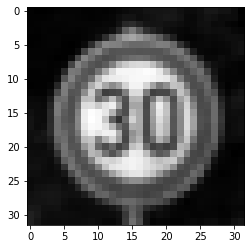

In [32]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Etapa 5: Criação do modelo e treinamento

Importante buscar arquiteturas que já existam para evitar ficar fazendo muitos testes e otimizações de parâmetros. Buscar arquiteturas para CNN

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6
    - 6 filtros de características com kernel 5x5 strides = (1,1)

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [33]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

# https://keras.io/api/layers/pooling_layers/max_pooling2d/ 
#- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1

# (None, 28, 28, 6)  None é devido ao batch size
# A entrada desta camada será (32, 32, 1)
# A saída desta camada será  (28, 28, 6)
LeNet.add(layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation = 'relu', input_shape = (32, 32, 1)))

# A entrada desta camada será (28, 28, 6)
# A saída desta camada será (14, 14, 6)
LeNet.add(layers.AveragePooling2D()) # pooling que fará a divisão por 2. Pode ter strides=(1,1)

# - STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
# A entrada desta camada será (14, 14, 6)
# A saída desta camada será (10, 10, 16)
LeNet.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'))

# A entrada desta camada será (10, 10, 16)
# A saída desta camada será (5, 5, 16) 
LeNet.add(layers.AveragePooling2D()) # A saída desta camada average_pooling2d_9 (Average (None, 5, 5, 16)

# Transforma em vetor
#- STEP 3: FLATTENING THE NETWORK
# A entrada desta camada é (5, 5, 16) 
# A saída desta camada é 5*5*16 = 400 neurônios
LeNet.add(layers.Flatten())  # A entrada e saída desta camada possuirá 400 neurônios

# STEP 4: FULLY CONNECTED LAYER
# A entrada desta camada é 400
# A saída desta camada é 120
LeNet.add(layers.Dense(units=120, activation='relu')) # Esta camada recebe 400 neurônios da anterior

#STEP 5: ANOTHER FULLY CONNECTED LAYER
# A entrada desta camada é 120
# A saída desta camada é 84
LeNet.add(layers.Dense(units=84, activation='relu')) # Esta camada recebe 120 neurônios

# STEP 6: FULLY CONNECTED LAYER
# A entrada desta camada é 84
# A saída desta camada é 43
LeNet.add(layers.Dense(units=43, activation='softmax')) # Esta camada recebe 84 neurônios

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Ao inves de passar 32x32=1024  pixels iremos passar apenas 400 pixels para a rede e esta é a vantagem de uma  rede neural convolucional

In [34]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [35]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50, #50
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 11s 154ms/step - loss: 3.2270 - accuracy: 0.1599 - val_loss: 2.8510 - val_accuracy: 0.2506
Epoch 2/50
70/70 [==============================] - 10s 147ms/step - loss: 1.6900 - accuracy: 0.5280 - val_loss: 1.3278 - val_accuracy: 0.6107
Epoch 3/50
70/70 [==============================] - 13s 189ms/step - loss: 0.8825 - accuracy: 0.7496 - val_loss: 0.9798 - val_accuracy: 0.6998
Epoch 4/50
70/70 [==============================] - 14s 203ms/step - loss: 0.6248 - accuracy: 0.8276 - val_loss: 0.8166 - val_accuracy: 0.7596
Epoch 5/50
70/70 [==============================] - 13s 190ms/step - loss: 0.4989 - accuracy: 0.8657 - val_loss: 0.7608 - val_accuracy: 0.7719
Epoch 6/50
70/70 [==============================] - 14s 194ms/step - loss: 0.4022 - accuracy: 0.8951 - val_loss: 0.6832 - val_accuracy: 0.7937
Epoch 7/50
70/70 [==============================] - 14s 195ms/step - loss: 0.3389 - accuracy: 0.9138 - val_loss: 0.6603 - val_accuracy: 0.8138

# Etapa 6: Avaliação do modelo

In [36]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Acurácia no teste: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.1561 - accuracy: 0.8766
Acurácia no teste: 0.8765637278556824


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [39]:
val_accuracy

[0.25056689977645874,
 0.6106575727462769,
 0.6997732520103455,
 0.759637176990509,
 0.7718820571899414,
 0.7936508059501648,
 0.8138322234153748,
 0.8337868452072144,
 0.8312925100326538,
 0.8312925100326538,
 0.8439909219741821,
 0.8507936596870422,
 0.8571428656578064,
 0.8351473808288574,
 0.8496598601341248,
 0.8526077270507812,
 0.8616780042648315,
 0.8505668640136719,
 0.8596372008323669,
 0.8553287982940674,
 0.855555534362793,
 0.8650793433189392,
 0.8668934106826782,
 0.8712018132209778,
 0.86099773645401,
 0.8671202063560486,
 0.8666666746139526,
 0.8734694123268127,
 0.8723356127738953,
 0.8655328750610352,
 0.8741496801376343,
 0.8804988861083984,
 0.8761904835700989,
 0.8761904835700989,
 0.8798186182975769,
 0.8761904835700989,
 0.8775510191917419,
 0.8666666746139526,
 0.8680272102355957,
 0.8734694123268127,
 0.8723356127738953,
 0.8709750771522522,
 0.8750566840171814,
 0.8795918226242065,
 0.8725623488426208,
 0.8780045509338379,
 0.8786848187446594,
 0.8807256221771

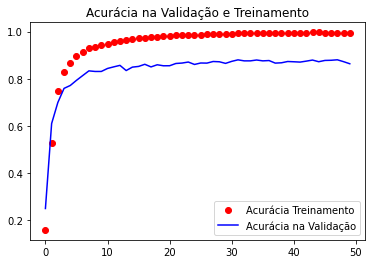

In [40]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Acurácia Treinamento')
plt.plot(epochs, val_accuracy, 'b', label='Acurácia na Validação')
plt.title('Acurácia na Validação e Treinamento')
plt.legend();

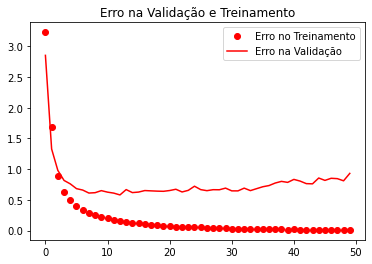

In [41]:
plt.plot(epochs, loss, 'ro', label='Erro no Treinamento')
plt.plot(epochs, val_loss, 'r', label='Erro na Validação')
plt.title('Erro na Validação e Treinamento')
plt.legend();

In [42]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


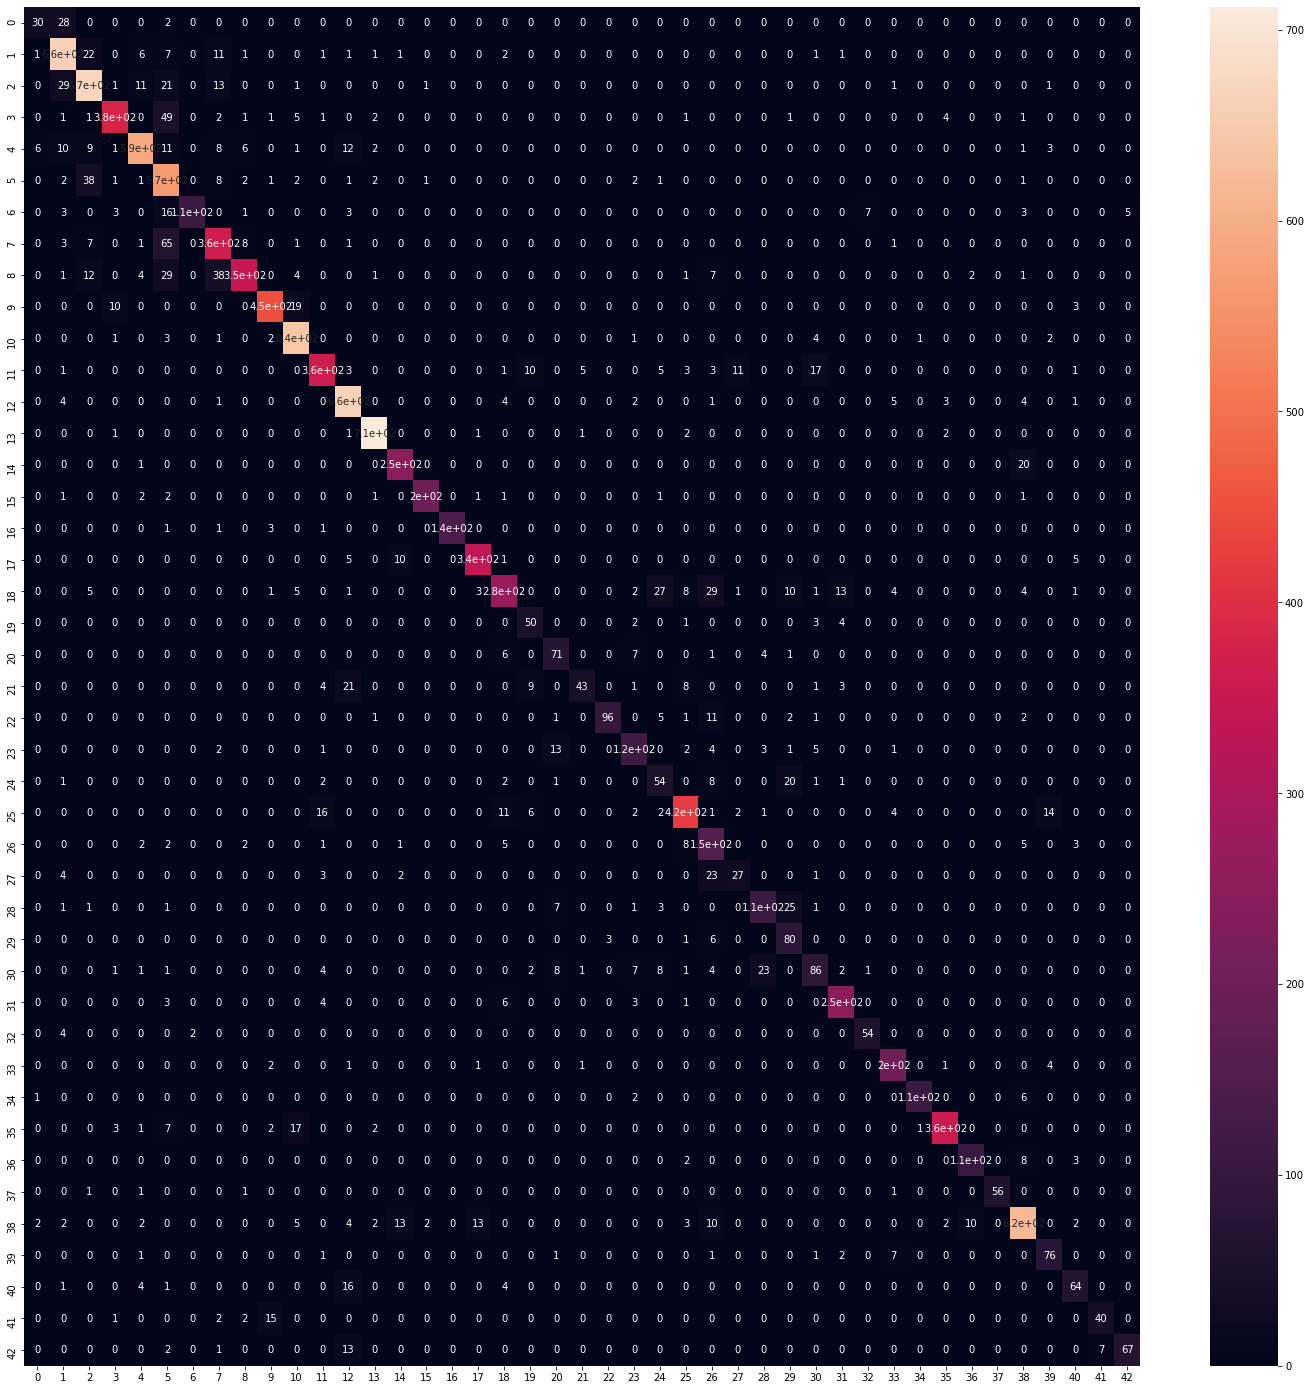

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        60
           1       0.87      0.92      0.90       720
           2       0.87      0.89      0.88       750
           3       0.94      0.84      0.89       450
           4       0.94      0.89      0.92       660
           5       0.72      0.90      0.80       630
           6       0.98      0.73      0.84       150
           7       0.80      0.81      0.81       450
           8       0.94      0.78      0.85       450
           9       0.94      0.93      0.94       480
          10       0.91      0.98      0.95       660
          11       0.90      0.86      0.88       420
          12       0.89      0.96      0.92       690
          13       0.98      0.99      0.98       720
          14       0.90      0.92      0.91       270
          15       0.98      0.95      0.97       210
          16       1.00      0.96      0.98       150
          17       0.95    

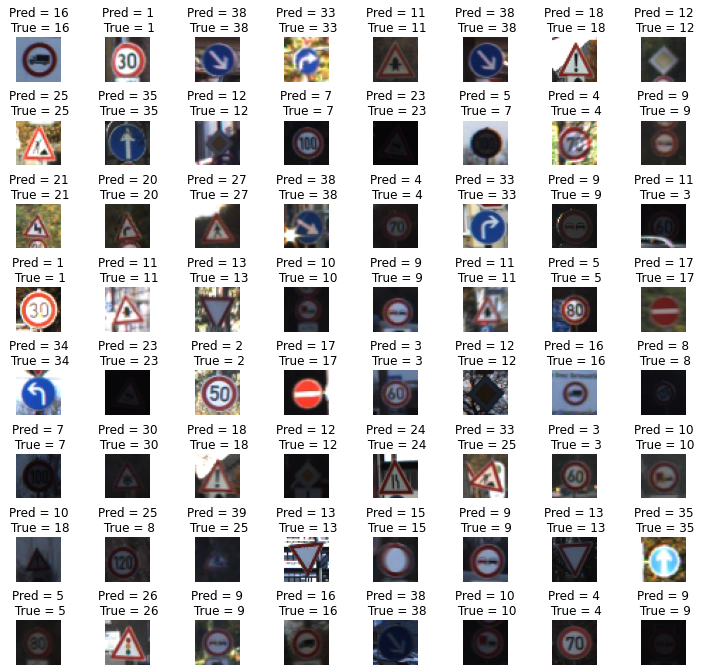

In [45]:
L = 8
W = 8

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Pred = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

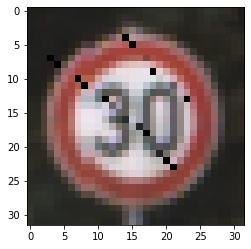

In [46]:
sample_image = tf.keras.preprocessing.image.load_img(r'./img_test/placa1.png', target_size=(32,32))
plt.imshow(sample_image)

sample_image = tf.keras.preprocessing.image.img_to_array(sample_image);
sample_image = np.expand_dims(sample_image, axis =0)
placa_gray = np.sum(sample_image / 3, axis=3, keepdims=True) 

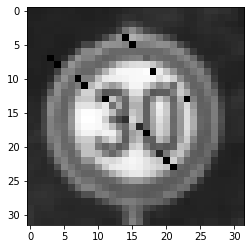

In [47]:
placa_gray_norm = (placa_gray - 128) / 128
plt.imshow(placa_gray_norm.squeeze(), cmap='gray')

In [48]:
predicted_classes1 = LeNet.predict_classes(placa_gray)

print(predicted_classes1)

[1]
